### Data setup and Import

In [1]:
import nltk

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
# Total no of messages
len(messages)

5574

In [4]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [5]:
for msg_no, msg in enumerate(messages[:6]):
    print(msg_no,msg ,'\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv 



In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection',sep = '\t', names = ['type','message'])

In [8]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA

In [9]:
df.describe()

,type,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.groupby('type').describe()

message                                                               
       count unique                                                top freq
type                                                                       
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [11]:
df['length'] = df['message'].apply(len)

In [12]:
df.head()

,type,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

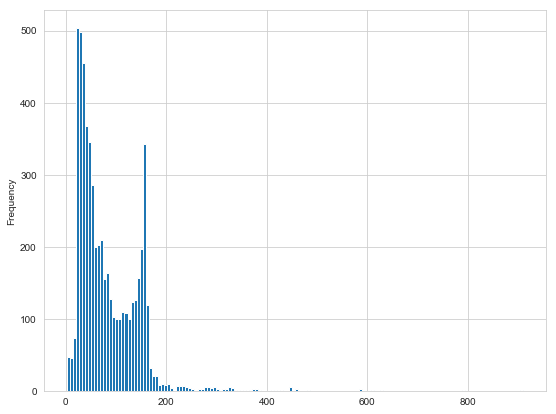

In [14]:
sb.set_style('whitegrid')
plt.figure(figsize=(9,7))
df.length.plot.hist(bins = 150)

Graph shows bimodal behaviour and more number of messages have length lesser than 100 and very few of length greater than 200 and also some above 800

In [15]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
df[df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12B9BC10>,
      dtype=object)

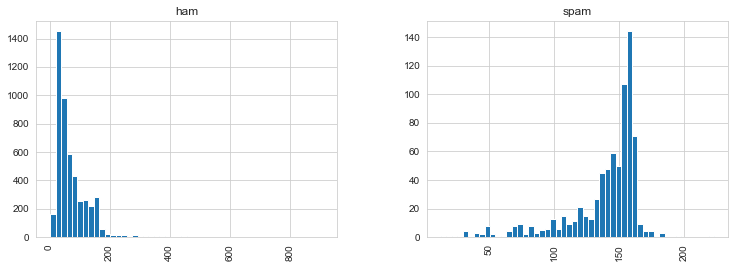

In [17]:
df.hist(column='length',by='type',bins = 50,figsize=(12,4))

It is evident that average length of ham messages is around 50 and around 160 for spam messages
So length of message is an important factor in detecting it as spam or ham.

### Text Preprocessing

In [18]:
from nltk.corpus import stopwords

stopwords are the words which doesn't make much difference in detecting spam or ham messages as they are commonly used

In [19]:
sample = 'Sample message! Notice : it has punctuations.'

In [26]:
import string
clean_sam = ''.join([letter for letter in sample if letter not in string.punctuation])  # remove punctuations

In [21]:
clean_sam

'Sample message Notice  it has punctuations'

In [27]:
# Remove Stopwords
clean_words = ' '.join([word for word in clean_sam.split() if word.lower() not in stopwords.words('english')])

In [23]:
clean_words

'Sample message Notice punctuations'

'It' and 'has' were stop words

In [24]:
def remove_fun(sen):
    """
    1.removes punctuation
    2.removes stopwords
    3. returns clean sentence
    """
    
    clean_sam = ''.join([letter for letter in sen if letter not in string.punctuation])
    return [word for word in clean_sam.split() if word.lower() not in stopwords.words('english')]

In [28]:
# Tokenization
df['message'].head().apply(remove_fun)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# Bag of words
sparse_mat = CountVectorizer(analyzer=remove_fun).fit(df['message'])

In [31]:
print(len(sparse_mat.vocabulary_)) # No of unique words in data frame

11425


In [32]:
sparse_mat.transform([df['message'][23]]).shape   # (Rows : messages , Columns : words)

(1, 11425)

In [34]:
msg77 = sparse_mat.transform([df['message'][76]])
print(msg77)

  (0, 3963)	1
  (0, 5709)	1
  (0, 6036)	1
  (0, 6818)	1
  (0, 9377)	1
  (0, 10629)	1


In [35]:
# Transform all the messages 
messages_bow = sparse_mat.transform(df['message'])

In [36]:
# shape of sparse matrix
messages_bow.shape

(5572, 11425)

In [37]:
# Amount of non zero occurences
messages_bow.nnz

50548

In [38]:
# No of non zero occurences vs total no of occurences
sparsity = (100 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
sparsity

0.07940295412668218

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

In [40]:
# Term Frequency
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [41]:
tfidf77 = tfidf_transformer.transform(msg77)

In [42]:
# Terms weightage in msg77
print(tfidf77)

  (0, 10629)	0.38067088860582404
  (0, 9377)	0.45767573331639944
  (0, 6818)	0.45767573331639944
  (0, 6036)	0.45767573331639944
  (0, 5709)	0.3495857684061418
  (0, 3963)	0.3232309305988952


In [43]:
# Inverse Document Frequency
tfidf_transformer.idf_[sparse_mat.vocabulary_['hello']]

7.8339293183414815

In [44]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

## Model Building

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,df['type'])

In [48]:
spam_detect_model.predict(tfidf77)[0]

'ham'

In [49]:
df['type'][77]

'ham'

## Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
msg_train,msg_test,type_train,type_test = train_test_split(df['message'],df['type'],test_size = 0.3)

In [52]:
from sklearn.pipeline import Pipeline

## Naive bayes Theorem

In [53]:
pipeline = Pipeline([ 
    ('bow', CountVectorizer(analyzer=remove_fun)),         # Strings to token integer counts
    ('tfidf',TfidfTransformer()),                          # integer counts to weighted TF-IDF scores
    ('Spam_model',MultinomialNB())                         # train on TF-IDF scores w/ naive byes classifier
])

In [54]:
pipeline.fit(msg_train,type_train)   # train model

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function remove_fun at 0x11F13150>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
  ...f=False, use_idf=True)), ('Spam_model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [55]:
pipeline.score(msg_test,type_test)   

0.9497607655502392

In [56]:
predictions = pipeline.predict(msg_test)   # Testing

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(confusion_matrix(type_test,predictions),'\n')
print(classification_report(type_test,predictions))

[[1424    0]
 [  84  164]] 

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1424
        spam       1.00      0.66      0.80       248

   micro avg       0.95      0.95      0.95      1672
   macro avg       0.97      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672



## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
pipeline = Pipeline([ 
    ('bow', CountVectorizer(analyzer=remove_fun)),         # Strings to token integer counts
    ('tfidf',TfidfTransformer()),                          # integer counts to weighted TF-IDF scores
    ('Spam_model',RandomForestClassifier(200))             # train on TF-IDF scores w/ Random forest classifier (200 Decision trees)
])

In [61]:
pipeline.fit(msg_train,type_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function remove_fun at 0x11F13150>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
  ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [62]:
pipeline.score(msg_test,type_test)

0.9647129186602871

In [63]:
predictions = pipeline.predict(msg_test)

In [64]:
print(confusion_matrix(type_test,predictions),'\n')
print(classification_report(type_test,predictions))

[[1424    0]
 [  59  189]] 

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1424
        spam       1.00      0.76      0.86       248

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.96      0.96      1672

